In [2]:
# IMPORTS
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import skimage.io as imo
import numpy as np
from skimage import transform
from skimage.color import rgb2gray
from tensorflow.keras.callbacks import TensorBoard
import joblib

In [3]:
tf.__version__

'2.8.0'

In [6]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)]
    labels = []
    images = []
    
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith('.ppm')]
        
        for f in file_names:
            images.append(imo.imread(f))
            labels.append(int(d))
            
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

images_train, labels_train = load_ml_data('BelgiumTSC_Training/Training')
images_test, labels_test = load_ml_data('BelgiumTSC_Testing/Testing')
print('Number of images:', len(images_train))
print('Number of labels:', len(labels_train))
print('Number of distinc traffic signals:', len(set(labels_train)))

C:\Users\Xexu\AppData\Local\Temp/ipykernel_2972/185388021.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


Number of images: 4575
Number of labels: 4575
Number of distinc traffic signals: 62


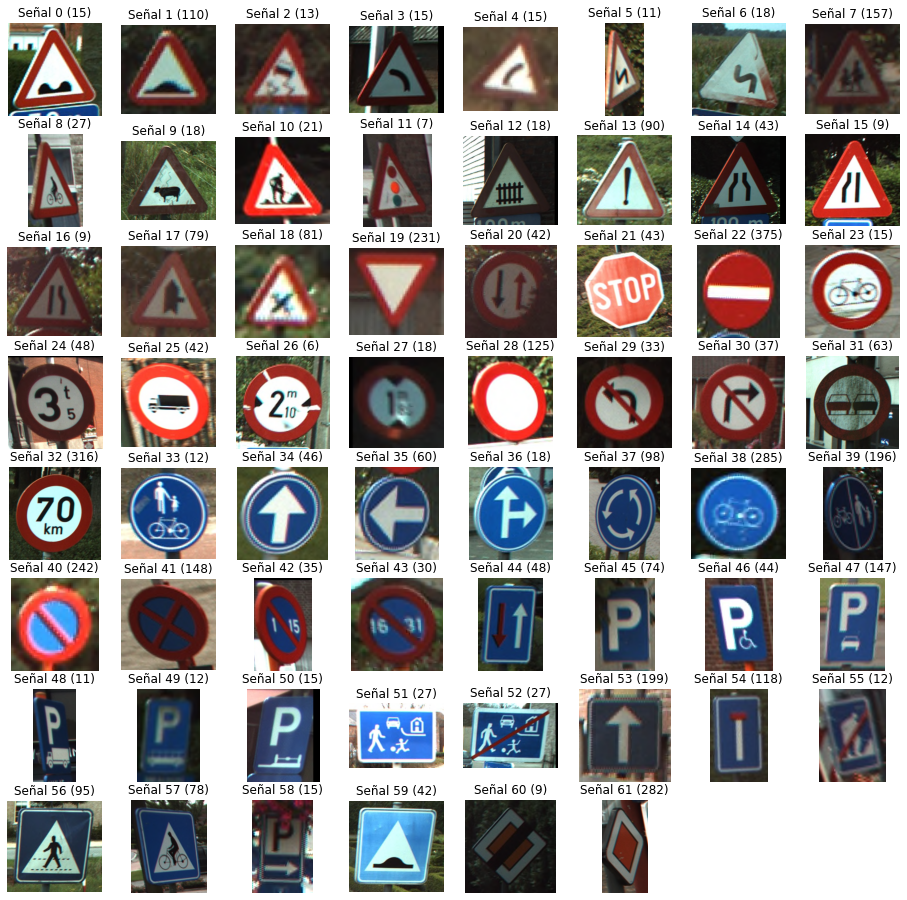

In [64]:
#Señales que seran classificadas
unique_labels = set(labels_train)
plt.figure(figsize=(16, 16))
i = 1
for label in unique_labels:
    temp_im = images_train[list(labels_train).index(label)]
    plt.subplot(8,8, i)
    plt.axis('off')
    plt.title('Señal {0} ({1})'.format(label, list(labels_train).count(label)))
    i += 1
    plt.imshow(temp_im)

In [5]:
#resize images
images_train = [transform.resize(image, (100,100)) for image in images_train]
images_test = [transform.resize(image, (100,100)) for image in images_test]

images_train = np.array(images_train)
images_test = np.array(images_test)

In [6]:
#gray scale
images_train = rgb2gray(images_train)
images_test = rgb2gray(images_test) 

In [7]:
images_train_optimized = []
for i, (imagen) in enumerate (images_train):
    imagen = imagen.reshape(100, 100, 1)
    images_train_optimized.append(imagen)
images_train = np.array(images_train_optimized)
images_train.shape

(4575, 100, 100, 1)

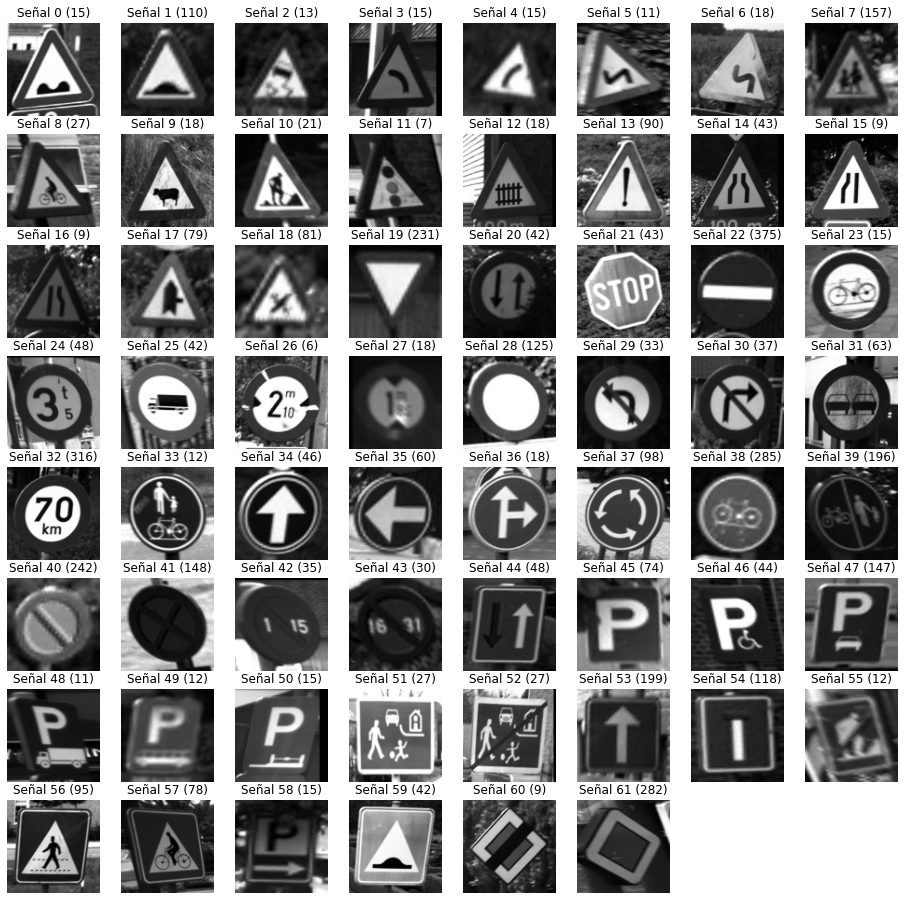

In [8]:
#Observamos resultados
unique_labels = set(labels_train)
plt.figure(figsize=(16, 16))
i = 1
for label in unique_labels:
    temp_im = images_train[list(labels_train).index(label)]
    plt.subplot(8,8, i)
    plt.axis('off')
    plt.title('Señal {0} ({1})'.format(label, list(labels_train).count(label)))
    i += 1
    plt.imshow(temp_im, cmap="gray")

In [9]:
#Crear modelos
modeloDenso = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(62, activation=tf.nn.softmax)    
])

modeloCNN = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(62, activation=tf.nn.softmax)  
    
])

In [10]:
modeloDenso.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

modeloCNN.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [11]:
tensorboardDenso = TensorBoard(log_dir='logs/denso')
modeloDenso.fit(images_train, labels_train,validation_split = 0.15, epochs=100, callbacks = [tensorboardDenso])

Epoch 1/100
122/122 [==============================] - 1s 7ms/step - loss: 2.6495 - accuracy: 0.3922 - val_loss: 11.7946 - val_accuracy: 0.0422
Epoch 2/100
122/122 [==============================] - 1s 6ms/step - loss: 1.2796 - accuracy: 0.6811 - val_loss: 14.6998 - val_accuracy: 0.0524
Epoch 3/100
122/122 [==============================] - 1s 7ms/step - loss: 0.8492 - accuracy: 0.7757 - val_loss: 19.7818 - val_accuracy: 0.0524
Epoch 4/100
122/122 [==============================] - 1s 7ms/step - loss: 0.6485 - accuracy: 0.8205 - val_loss: 19.0282 - val_accuracy: 0.0524
Epoch 5/100
122/122 [==============================] - 1s 7ms/step - loss: 0.5612 - accuracy: 0.8387 - val_loss: 20.2576 - val_accuracy: 0.0524
Epoch 6/100
122/122 [==============================] - 1s 6ms/step - loss: 0.4498 - accuracy: 0.8675 - val_loss: 23.4216 - val_accuracy: 0.0524
Epoch 7/100
122/122 [==============================] - 1s 6ms/step - loss: 0.3521 - accuracy: 0.8891 - val_loss: 24.5338 - val_accuracy:

In [13]:
tensorboardCNN = TensorBoard(log_dir='logs/CNN')
modeloCNN.fit(images_train, labels_train, epochs=100, callbacks = [tensorboardCNN])

Epoch 1/100
143/143 [==============================] - 30s 207ms/step - loss: 2.2132 - accuracy: 0.5143
Epoch 2/100
143/143 [==============================] - 30s 211ms/step - loss: 0.5634 - accuracy: 0.8546
Epoch 3/100
143/143 [==============================] - 31s 216ms/step - loss: 0.2061 - accuracy: 0.9395
Epoch 4/100
143/143 [==============================] - 31s 213ms/step - loss: 0.1073 - accuracy: 0.9674
Epoch 5/100
143/143 [==============================] - 31s 216ms/step - loss: 0.0696 - accuracy: 0.9790
Epoch 6/100
143/143 [==============================] - 30s 213ms/step - loss: 0.0410 - accuracy: 0.9880
Epoch 7/100
143/143 [==============================] - 30s 213ms/step - loss: 0.0439 - accuracy: 0.9871
Epoch 8/100
143/143 [==============================] - 30s 207ms/step - loss: 0.0337 - accuracy: 0.9910
Epoch 9/100
143/143 [==============================] - 29s 205ms/step - loss: 0.0351 - accuracy: 0.9913
Epoch 10/100
143/143 [==============================] - 30s 209m

Real label: 7
Label predicted: 7


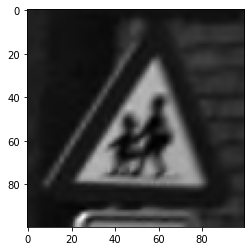

In [16]:
#Resultado prediccion de cada imagen
predict = modeloDenso.predict(images_test)

image_to_predict = 130

plt.imshow(images_test[image_to_predict], cmap="gray")

label_predicted = np.argmax(predict[image_to_predict])

true_label = str(labels_test[image_to_predict])
predicted_label = str(label_predicted)

print("Real label: " + true_label)
print("Label predicted: " + predicted_label)

Real label: 7
Label predicted: 7


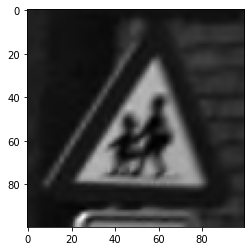

In [17]:
#Resultado prediccion de cada imagen
predict = modeloCNN.predict(images_test)

image_to_predict = 130

plt.imshow(images_test[image_to_predict], cmap="gray")

label_predicted = np.argmax(predict[image_to_predict])

true_label = str(labels_test[image_to_predict])
predicted_label = str(label_predicted)

print("Real label: " + true_label)
print("Label predicted: " + predicted_label)

In [20]:
#Resultados Denso tras predecir todas las imagenes_test
predict = modeloDenso.predict(images_test)

counter = 0
for i in range(len(images_test)):
    image_to_predict = i
    label_predicted = np.argmax(predict[image_to_predict])
    true_label = str(labels_test[image_to_predict])
    predicted_label = str(label_predicted)
    
    if(true_label == predicted_label):
        counter = counter + 1
percent = counter * 100/len(images_test)

print("Accuracy Dense: ", percent, "%")

Accuracy Dense:  79.12698412698413 %


In [21]:
#Resultados CNN tras predecir todas las imagenes_test
predict = modeloCNN.predict(images_test)

counter = 0
for i in range(len(images_test)):
    image_to_predict = i
    label_predicted = np.argmax(predict[image_to_predict])
    true_label = str(labels_test[image_to_predict])
    predicted_label = str(label_predicted)
    
    if(true_label == predicted_label):
        counter = counter + 1
percent = counter * 100/len(images_test)

print("Accuracy CNN: ", percent, "%")

Accuracy CNN:  94.16666666666667 %


In [49]:
#Vamos a provar con un grupo de imagenes sin fondo
def load_images(data_directory):
    dirs = [d for d in os.listdir(data_directory)]
    labels = []
    images = []
    
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith('.png')]
        
        for f in file_names:
            images.append(imo.imread(f))
            labels.append(int(d))
            
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

white_images, white_labels = load_images('Fondo_blanco')
print('Number of images:', len(white_images))
print('Number of labels:', len(white_labels))

Number of images: 90
Number of labels: 90


C:\Users\Xexu\AppData\Local\Temp/ipykernel_17440/574718977.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


In [51]:
#resize
white_images = [transform.resize(image, (100,100)) for image in white_images]

white_images = np.array(white_images)

In [52]:
#gray
white_images = rgb2gray(white_images)

C:\Users\Xexu\AppData\Local\Temp/ipykernel_17440/2206001056.py:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  white_images = rgb2gray(white_images)
C:\Users\Xexu\AppData\Local\Temp/ipykernel_17440/2206001056.py:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  color_images = rgb2gray(color_images)


In [53]:
#Resultados Dense con imagenes white
predict = modeloDenso.predict(white_images)

counter = 0
for i in range(len(white_images)):
    image_to_predict = i
    label_predicted = np.argmax(predict[image_to_predict])
    true_label = str(white_labels[image_to_predict])
    predicted_label = str(label_predicted)
    
    if(true_label == predicted_label):
        counter = counter + 1
percent = counter * 100/len(white_images)

print("Accuracy Dense white_images: ", percent, "%")

Accuracy Dense white_images:  31.11111111111111 %
Accuracy Dense color_images:  0.0 %


In [54]:
#Resultados CNN con imagenes white
predict = modeloCNN.predict(white_images)

counter = 0
for i in range(len(white_images)):
    image_to_predict = i
    label_predicted = np.argmax(predict[image_to_predict])
    true_label = str(white_labels[image_to_predict])
    predicted_label = str(label_predicted)
    
    if(true_label == predicted_label):
        counter = counter + 1
percent = counter * 100/len(white_images)

print("Accuracy CNN white_images: ", percent, "%")

Accuracy CNN white_images:  38.888888888888886 %
Accuracy CNN color_images:  100.0 %
